In [136]:
import pandas as pd
test=pd.read_csv('test.csv')
train=pd.read_csv('train.csv')

In [137]:
train.head()

,id,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,target_class
0,16330,138.835938,45.453922,-0.096961,0.086516,3.082776,18.529846,7.179262,60.660346,0
1,5999,130.296875,51.969546,-0.005585,-0.295680,4.299331,23.557530,6.883942,52.337106,0
2,10228,127.328125,55.471714,0.090976,-0.444422,69.913880,73.240545,0.434744,-1.249027,0
3,2980,102.453125,44.412987,0.652927,1.101361,2.425585,15.501871,9.213629,106.097405,0
4,2472,104.921875,41.629431,0.189677,0.725700,3.275084,18.661805,7.389537,65.169692,0


In [138]:
cols=['id','V1','V2','V3','V4','V5','V6','V7','V8','target_class']
train.columns=cols
test.columns=cols[:-1]
train.head()

,id,V1,V2,V3,V4,V5,V6,V7,V8,target_class
0,16330,138.835938,45.453922,-0.096961,0.086516,3.082776,18.529846,7.179262,60.660346,0
1,5999,130.296875,51.969546,-0.005585,-0.295680,4.299331,23.557530,6.883942,52.337106,0
2,10228,127.328125,55.471714,0.090976,-0.444422,69.913880,73.240545,0.434744,-1.249027,0
3,2980,102.453125,44.412987,0.652927,1.101361,2.425585,15.501871,9.213629,106.097405,0
4,2472,104.921875,41.629431,0.189677,0.725700,3.275084,18.661805,7.389537,65.169692,0


In [139]:
train.isna().sum()

id              0
V1              0
V2              0
V3              0
V4              0
V5              0
V6              0
V7              0
V8              0
target_class    0
dtype: int64

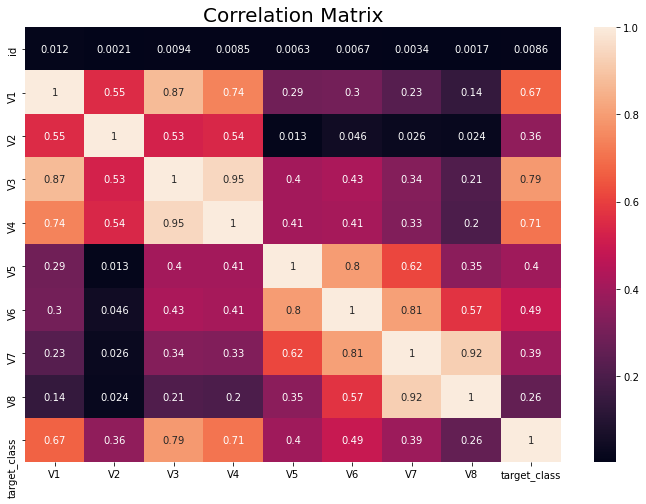

In [140]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
train_corr=train.corr().abs()
plt.figure(figsize=(12,8))
plt.title('Correlation Matrix',fontsize=20)
sns.heatmap(train_corr.drop(['id'],axis=1),annot=True)
plt.show()

In [141]:
corr_vals=train_corr
corr_vals=corr_vals['V7']
corr_vals

id              0.003443
V1              0.227218
V2              0.025596
V3              0.336287
V4              0.326339
V5              0.615579
V6              0.808571
V7              1.000000
V8              0.923223
target_class    0.390269
Name: V7, dtype: float64

In [142]:
import numpy as np
upper_tri = train_corr.where(np.triu(np.ones(train_corr.shape),k=1).astype(np.bool))
upper_tri

,id,V1,V2,V3,V4,V5,V6,V7,V8,target_class
id,NaN,0.012082,0.002086,0.009448,0.008541,0.006347,0.006732,0.003443,0.001682,0.008594
V1,NaN,NaN,0.552478,0.873473,0.738974,0.287538,0.297747,0.227218,0.139540,0.672304
V2,NaN,NaN,NaN,0.526525,0.543117,0.012791,0.045540,0.025596,0.024178,0.362363
V3,NaN,NaN,NaN,NaN,0.946269,0.404575,0.426082,0.336287,0.211153,0.791776
V4,NaN,NaN,NaN,NaN,NaN,0.406169,0.411906,0.326339,0.202633,0.711313
V5,NaN,NaN,NaN,NaN,NaN,NaN,0.797382,0.615579,0.352638,0.395620
V6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.808571,0.572731,0.490554
V7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.923223,0.390269
V8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.258525
target_class,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [143]:
to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.9)]
to_drop

['V4', 'V8']

In [144]:
# Dropping v4 and v8

In [145]:
train=train.drop(['V4'],axis=1)
test=test.drop(['V4'],axis=1)
train.head()

,id,V1,V2,V3,V5,V6,V7,V8,target_class
0,16330,138.835938,45.453922,-0.096961,3.082776,18.529846,7.179262,60.660346,0
1,5999,130.296875,51.969546,-0.005585,4.299331,23.557530,6.883942,52.337106,0
2,10228,127.328125,55.471714,0.090976,69.913880,73.240545,0.434744,-1.249027,0
3,2980,102.453125,44.412987,0.652927,2.425585,15.501871,9.213629,106.097405,0
4,2472,104.921875,41.629431,0.189677,3.275084,18.661805,7.389537,65.169692,0


In [146]:
test_1=test.drop('id',axis=1)

In [147]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [164]:
X_train,X_test,y_train,y_test=train_test_split(X_scaled,y,test_size=0.2,random_state=101)


In [165]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score
from sklearn.pipeline import make_pipeline

In [166]:
model=make_pipeline(StandardScaler(),LogisticRegression(class_weight='balanced'))
model.fit(X_train,y_train)
preds=model.predict(X_test)
print('F1 SCORE : {}'.format(f1_score(y_test,preds)))

F1 SCORE : 0.8206039076376556


In [167]:
model=LogisticRegression()
model.fit(X_train,y_train)
preds=model.predict(X_test)
print('F1 SCORE : {}'.format(f1_score(y_test,preds)))

F1 SCORE : 0.8595744680851063


In [168]:
model=LogisticRegression(class_weight={0:1,1:6})
model.fit(X_train,y_train)
preds=model.predict(X_test)
print('F1 SCORE : {}'.format(f1_score(y_test,preds)))

F1 SCORE : 0.8560606060606061


In [169]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

In [170]:
model=SVC(class_weight='balanced')
model.fit(X_train,y_train)
preds=model.predict(X_test)
print('F1 SCORE : {}'.format(f1_score(y_test,preds)))

F1 SCORE : 0.8582089552238805


In [171]:
model=SVC()
model.fit(X_train,y_train)
preds=model.predict(X_test)
print('F1 SCORE : {}'.format(f1_score(y_test,preds)))

F1 SCORE : 0.864406779661017


In [156]:
from sklearn.

SyntaxError: invalid syntax (<ipython-input-156-f8934e568edb>, line 1)

In [157]:
X=train.drop(['id','target_class'],axis=1)
y=train['target_class']
scaler=StandardScaler()
scaled_features=scaler.fit_transform(X)
X_scaled = pd.DataFrame(scaled_features, index=X.index, columns=X.columns)
test_1=pd.DataFrame(scaler.fit_transform(test_1), index=test_1.index, columns=test_1.columns)
test_1.head()

,V1,V2,V3,V5,V6,V7,V8
0,0.788185,0.705644,-0.386030,-0.358446,-0.683971,0.499650,0.438100
1,-3.446595,-0.705433,3.475376,0.000638,0.694232,-1.041467,-0.880482
2,0.113902,-0.134850,-0.393218,-0.352867,-0.688370,0.432144,0.413620
3,-0.359885,-0.320084,0.103904,-0.333949,-0.345214,0.185650,-0.127600
4,-0.578888,-0.370690,-0.166236,-0.363067,-0.519796,0.691064,0.404672


In [172]:
param_grid = {'C': [0.1, 10, 100,1000], 'gamma': [0.1,0.01,0.001,0.0001],'kernel': ['rbf', 'poly', 'sigmoid','linear']}

In [173]:
grid = GridSearchCV(SVC(),param_grid,refit=True,verbose=2)
grid.fit(X_scaled,y)

Fitting 5 folds for each of 64 candidates, totalling 320 fits
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   0.6s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   0.6s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   0.6s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   0.6s


KeyboardInterrupt: 

In [ ]:
grid.best_params_

In [174]:
model=SVC(C=1000,gamma=0.01,kernel='rbf',class_weight={0:1,1:5})
model.fit(X_train,y_train)
preds=model.predict(X_test)
print('F1 SCORE : {}'.format(f1_score(y_test,preds)))

F1 SCORE : 0.8840864440078585


In [ ]:
predictions=model.predict(test_1)
submissions={'id':test['id'],'target_class':predictions}
submissions=pd.DataFrame(submissions)
submissions.head()

In [ ]:
submissions.to_csv('laststraw.csv',index=False)

got score ->0.926